# Data Intensive Computing Project - Phase I

### Pradeepsurya Rajendran (rajendr4)

In [334]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.impute import KNNImputer

# Set the font size globally for all plots
matplotlib.rcParams['font.size'] = 12

# Dataset - Credit Score Brackets Classification (https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv)
data_df = pd.read_csv("train.csv")
df = data_df.copy()
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.



ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

# Exploratory Data Analysis (EDA) + Data Cleaning/Preprocessing (DC)

## Checking the dataset info - data shape, data type of each feature, columns with missing values (EDA)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

The dataset has 100,000 records with 27 input features and 1 target variable (Credit_Score). Most of the columns are of object data type while other being int and float. These columns have to be checked to ensure whether the datatype is correct. Few columns have missing values that need to be addressed.

## Deduplication - duplicate records check (EDA)

In [336]:
print(f"Total number of duplicate records = {sum(df.duplicated())}")

Total number of duplicate records = 0


There are no duplicate records in the dataset.

## Removing Inconsistent format in input features (DC)

In [337]:
# Checking the unique values of all columns to asses the inconsistencies in the data entry
for i in df['Age'].unique():
  #print(i)
  pass

# To avoid incresing the file size, the printed output was removed after checking the values of all features

Some of the numerical features contain so many values with underscore that needs to be removed. Also, other inconsistencies in the data entry have to be fixed.

### Age

In [338]:
# Removing underscore from numerical value
df['Age'] = df['Age'].str.replace('_', '')

### Annual_Income

In [339]:
# Similarly Annual_Income also contains underscore characters and have to be removed
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')

### Num_Loan

In [340]:
# Removing underscore from numerical value
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','')

### Num_of_Delayed_Payment

In [341]:
# Removing underscore from numerical value
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')

# if the value is negative changing it to +ve because days cannot be negative and we are assuming that the customer has not delayed 
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: 0 if float(x) < 0 else x)

### Changed_Credit_Limit

In [342]:
# Removing underscore from numerical value
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.NaN)

### Outstanding_Debt

In [343]:
# Removing underscore from numerical value
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')

### Amount_invested_monthly

In [344]:
# Removing underscore from numerical value
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_','')

### Monthly_Balance

In [345]:
# Removing underscore from numerical value
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','')

### Payment_of_Min_Amount

In [346]:
#df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('NM', 'No')

### Credit_Mix

In [347]:
df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', 'Unknown')


### Occupation

In [348]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [349]:
df['Occupation'] = df['Occupation'].replace('_______', np.NaN)

### Delay_from_due_date

In [350]:
# Replacing negative values with 0 as days cannot be negative
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: x if float(x)>=0 else 0)

## Missing Values Imputation (DC)

In [351]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

Features with missing values and its count: 
* Name - 9985
* Type_of_Loan - 11408
* Monthly_Inhand_Salary - 15002
* Num_of_Delayed_Payment - 7002
* Num_Credit_Inquires - 1965
* Credit_History_Age - 9030
* Amount_invested_monthly - 4479
* Monthly_Balance - 2868
* Occupation - 7062

In [352]:
cust_total = df['Customer_ID'].nunique()
print(f"The dataset contains records for {cust_total} unique customers")
print(f"Each Customer has {df.shape[0]//cust_total} records")

The dataset contains records for 12500 unique customers
Each Customer has 8 records


### Name

In [353]:
# Since each customer has 8 records, missing Name value can be filled with coorect customer name based on customer id
df['Name'] = df.groupby('Customer_ID')['Name'].transform(lambda x : x.fillna(x.mode()[0])) 


**Duplicate Names check** (EDA)

In [354]:
customer_names = df.groupby(['Customer_ID']).aggregate(unique_names=('Name', pd.Series.mode))['unique_names'].values
print(f"Number of unique customer IDs = {df['Customer_ID'].nunique()}")
print(f"Number of unique customers = {len(customer_names)}")

unique_customer_names = np.unique(customer_names)
print(f"Number of customers with unique names = {len(unique_customer_names)}")
print(f"Number of customers name duplicates = {len(customer_names) - len(unique_customer_names)}")

Number of unique customer IDs = 12500
Number of unique customers = 12500
Number of customers with unique names = 10139
Number of customers name duplicates = 2361


Although there are 12500 unique customers, 2361 of those customers have names similar to other customers in the dataset. Thus, the imputation of missing values in other columns should be performed based on customer_id of each customer.

### Monthly_Inhand_Salary

**Distribution Analysis - EDA**

In [355]:
monthly_salary = df.groupby(["Customer_ID"]).aggregate(mean_salary_monthly=('Monthly_Inhand_Salary', 'mean'))

fig = px.histogram(monthly_salary, x='mean_salary_monthly', title='Histogram of Monthly Inhand Salary grouped by Customer ID',
                   labels={'mean_salary_monthly':'Average Monthly Salary'}, nbins=20)
fig.show()

**Insights:**
* 52% of the Customers average monthly income falls in the range 1000 USD to 4000 USD.
* Less than 1.6% of customers earns more than 13,000 USD per month. These small proportion cannot be treated as outliers as people can earn such amount.
* The distribution of the monthly income of the customer is positively skewed - skewed to the right. Thus, log transform may help in changing the distribution to near normal, which will help better capture the underlying pattern during modelling.

**Relationship between Monthly Inhand Salary and Credit Score Brackets** (EDA)

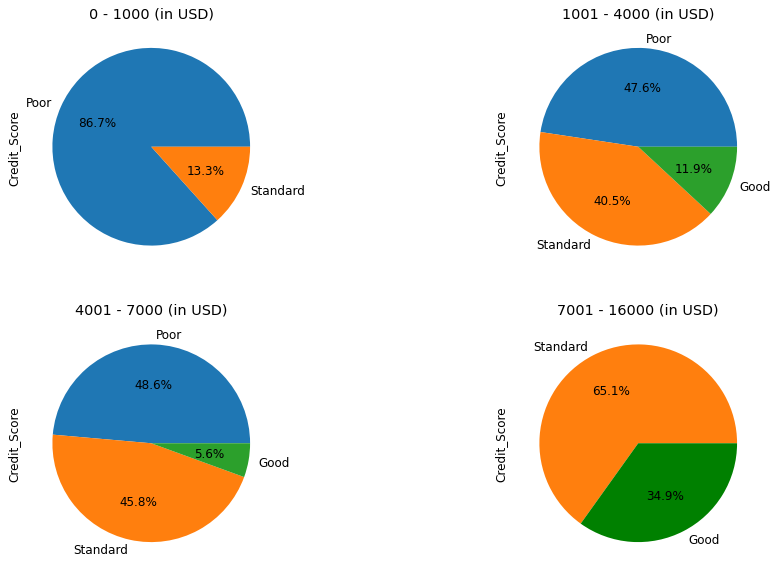

In [356]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

df1 = df[df['Monthly_Inhand_Salary'].isin(range(0, 1001))]['Credit_Score'].value_counts().plot.pie(ax=axes[0][0], autopct='%1.1f%%')
df2 = df[df['Monthly_Inhand_Salary'].isin(range(1001, 4001))]['Credit_Score'].value_counts().plot.pie(ax=axes[0][1], autopct='%1.1f%%')
df3 = df[df['Monthly_Inhand_Salary'].isin(range(4001, 7001))]['Credit_Score'].value_counts().plot.pie(ax=axes[1][0], autopct='%1.1f%%')
df4 = df[df['Monthly_Inhand_Salary'].isin(range(7001, 16001))]['Credit_Score'].value_counts().plot.pie(ax=axes[1][1], colors=['#FF7F0E','green'], autopct='%1.1f%%')

# Set titles
axes[0][0].set_title('0 - 1000 (in USD)')
axes[0][1].set_title('1001 - 4000 (in USD)')
axes[1][0].set_title('4001 - 7000 (in USD)')
axes[1][1].set_title('7001 - 16000 (in USD)')

# Display plot
plt.show()

**Insights** 
* Customers having less than 1000 USD inhand salary per month are 87% more likely to have POOR credit score and 0% chance of having GOOD credit score.
* On the other hand, customers who have more 7000 USD inhand salary per month have 0% chance of POOR credit score and highly likely to fall in STANDARD score bracket.
* All customers with inhand salary in between have equal likelihood to have either POOR or STANDARD credit score.

**Filling missing values in Monthly_Inhand_Salary with most occuring monthly inhand salary values in each customer ID**

In [357]:
# Since each customer has 8 records, missing 'Monthly_Inhand_Salary' value can be filled with salary value of the same customer in other month 
# Assumption - Customer's monthly inhand salary doesn;t change for each month in the given dataset

df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x : x.fillna(x.mode()[0])) 

### Num_of_Delayed_Payment

In [ ]:
# Filling missing values in Num_of_Delayed_Payment with most occuring in each customer ID
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x : x.fillna(x.mode()[0])) 

### Num_Credit_Inquiries

In [359]:
# Filling missing values in Num_Credit_Inquiries with most occuring values in each customer ID
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x : x.fillna(x.mode()[0])) 

### Credit_History_Age

In [360]:
# Filling missing values in Credit_History_Age with most occuring values in each customer ID
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x : x.fillna(x.mode()[0])) 

Column Transformation year and months to months (DC)

In [361]:
df['Credit_History_Age'].values

array(['22 Years and 1 Months', '22 Years and 1 Months',
       '22 Years and 3 Months', ..., '31 Years and 8 Months',
       '31 Years and 9 Months', '31 Years and 10 Months'], dtype=object)

In [362]:
def month_calc(val):
  temp = val.split()
  year = int(temp[0])*12
  months = int(temp[3])
  return year + months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(month_calc)

In [363]:
df['Credit_History_Age'].values

array([265, 265, 267, ..., 380, 381, 382])

### Amount_invested_monthly (DC)

In [364]:
# Converting datatype from object to float
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

# Filling missing values in Amount_invested_monthly with mean of all monthly invested values by each customer 
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x : x.fillna(x.mean())) 

### Monthly_Balance

In [365]:
# Converting datatype from object to float
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

# Filling missing values in Monthly_Balance with mean of all monthly invested values by each customer 
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x : x.fillna(x.mean())) 

In [366]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         2091
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance              1696
Credit_Score                    0
dtype: int64

In [367]:
# some of the customers dont have monthly balance value in any of their records. so assuming it to be zero.
df['Monthly_Balance'].fillna(0, inplace=True)

### Occupation

In [368]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x : x.fillna(x.mode()[0])) 

### Changed_Credit_Limit

In [369]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

# Filling missing values in Changed_Credit_Limit with mean of all values in each customer 
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x : x.fillna(x.mean())) 

## Data type Conversion (DC)

Some of the features (*Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt,
Amount_invested_monthly, Monthly_Balance*) with numerical values are incorrectly identified as object data type and these have to converted to appropriate data type.

In [370]:
features = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',  
            'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
            
# Converting Object to Float
for val in features:
  df[val] = df[val].astype(float)

## Distribution of Target Variable (EDA)

Text(0.5, 1.0, 'Distribution of Target Categories')

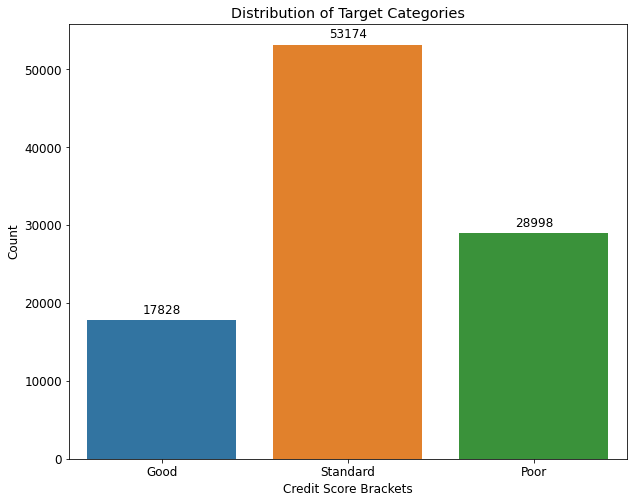

In [371]:
plt.figure(figsize=(10,8))

# Credit score categories record count
ax = sns.countplot(x='Credit_Score', data=df)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
  
plt.xlabel('Credit Score Brackets')
plt.ylabel('Count')
plt.title("Distribution of Target Categories")

The dataset contains imbalanced records. These counts may represent the distribution of the actual population but still to avoid the introduction of bias into the modelling, it is essential to handle this imbalance.

## Summary Statistics of Numerical features (EDA)

In [372]:
df.describe().T

count          mean           std           min  \
Age                       100000.0  1.106497e+02  6.862447e+02 -5.000000e+02   
Annual_Income             100000.0  1.764157e+05  1.429618e+06  7.005930e+03   
Monthly_Inhand_Salary     100000.0  4.198351e+03  3.187402e+03  3.036454e+02   
Num_Bank_Accounts         100000.0  1.709128e+01  1.174048e+02 -1.000000e+00   
Num_Credit_Card           100000.0  2.247443e+01  1.290574e+02  0.000000e+00   
Interest_Rate             100000.0  7.246604e+01  4.664226e+02  1.000000e+00   
Num_of_Loan               100000.0  3.009960e+00  6.264788e+01 -1.000000e+02   
Delay_from_due_date       100000.0  2.108191e+01  1.484020e+01  0.000000e+00   
Num_of_Delayed_Payment    100000.0  2.969956e+01  2.180259e+02  0.000000e+00   
Changed_Credit_Limit      100000.0  1.038854e+01  6.784097e+00 -6.490000e+00   
Num_Credit_Inquiries      100000.0  2.732105e+01  1.912952e+02  0.000000e+00   
Outstanding_Debt          100000.0  1.426220e+03  1.155129e+03  2.300000e-01   
Credit_Utilization_Ratio  100000.0  3.228517e+01  5.116875e+00  2.000000e+01   
Credit_History_Age        100000.0  2.211116e+02  9.966875e+01  1.000000e+00   
Total_EMI_per_month       100000.0  1.403118e+03  8.306041e+03  0.000000e+00   
Amount_invested_monthly   100000.0  6.375697e+02  2.004193e+03  0.000000e+00   
Monthly_Balance           100000.0 -3.000000e+22  3.162151e+24 -3.333333e+26   

                                   25%           50%           75%  \
Age                          24.000000     33.000000     42.000000   
Annual_Income             19457.500000  37578.610000  72790.920000   
Monthly_Inhand_Salary      1626.761667   3095.978333   5961.637500   
Num_Bank_Accounts             3.000000      6.000000      7.000000   
Num_Credit_Card               4.000000      5.000000      7.000000   
Interest_Rate                 8.000000     13.000000     20.000000   
Num_of_Loan                   1.000000      3.000000      5.000000   
Delay_from_due_date          10.000000     18.000000     28.000000   
Num_of_Delayed_Payment        9.000000     14.000000     18.000000   
Changed_Credit_Limit          5.340000      9.400000     14.850000   
Num_Credit_Inquiries          3.000000      6.000000      9.000000   
Outstanding_Debt            566.072500   1166.155000   1945.962500   
Credit_Utilization_Ratio     28.052567     32.305784     36.496663   
Credit_History_Age          144.000000    219.000000    302.000000   
Total_EMI_per_month          30.306660     69.249473    161.224249   
Amount_invested_monthly      76.057014    138.495050    274.671232   
Monthly_Balance             266.893393    334.110644    467.481215   

                                   max  
Age                       8.698000e+03  
Annual_Income             2.419806e+07  
Monthly_Inhand_Salary     1.520463e+04  
Num_Bank_Accounts         1.798000e+03  
Num_Credit_Card           1.499000e+03  
Interest_Rate             5.797000e+03  
Num_of_Loan               1.496000e+03  
Delay_from_due_date       6.700000e+01  
Num_of_Delayed_Payment    4.397000e+03  
Changed_Credit_Limit      3.697000e+01  
Num_Credit_Inquiries      2.597000e+03  
Outstanding_Debt          4.998070e+03  
Credit_Utilization_Ratio  5.000000e+01  
Credit_History_Age        4.040000e+02  
Total_EMI_per_month       8.233100e+04  
Amount_invested_monthly   1.000000e+04  
Monthly_Balance           1.602041e+03

Some of the features such as Age, Num_Bank_Accounts, Num_of_Loan, have negative values that are definitely incorrect and the distribution of these features has to be analyzed further to check for outliers.

## Value Counts of Payment_Behaviour (EDA)

Text(0.5, 1.0, 'Payment Behaviour Value Counts')

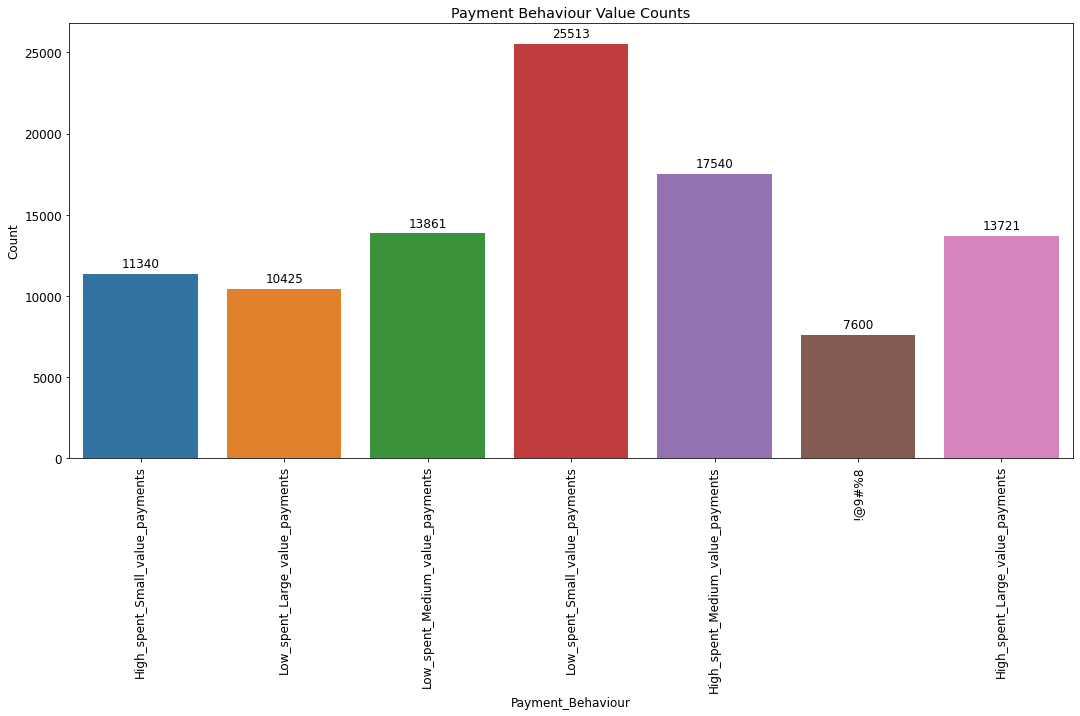

In [373]:
plt.figure(figsize=(18,8))

# Payment Behaviour categories record count
ax = sns.countplot(x='Payment_Behaviour', data=df)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title("Payment Behaviour Value Counts")

**Insights**
* Customer who spends low amount and make payment in small values account for 25.5% of the sample.
* Almost 7.6% of total records don't have the value for payment_behaviour. Further analysis is required to assign proper value to these records.

In [374]:
# Replacing garbage value with 'Not_specified'.
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('!@9#%8', 'Not_Specified')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'High_spent_Small_value_payments'),
  Text(1, 0, 'Low_spent_Large_value_payments'),
  Text(2, 0, 'Low_spent_Medium_value_payments'),
  Text(3, 0, 'Low_spent_Small_value_payments'),
  Text(4, 0, 'High_spent_Medium_value_payments'),
  Text(5, 0, 'Not_Specified'),
  Text(6, 0, 'High_spent_Large_value_payments')])

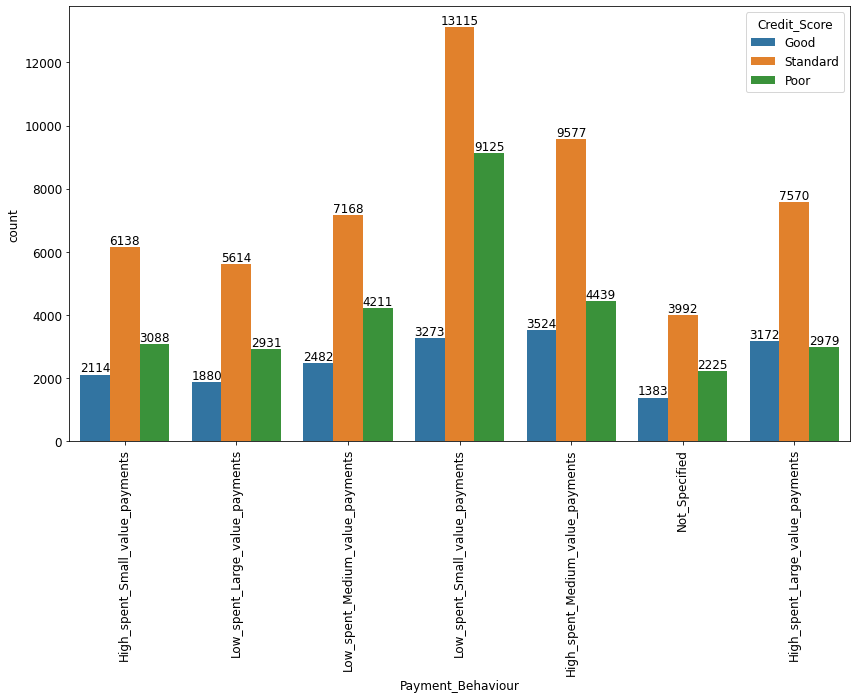

In [375]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)

## Outlier Detection and Removal (EDA + DC)

Text(0, 0.5, 'Values')

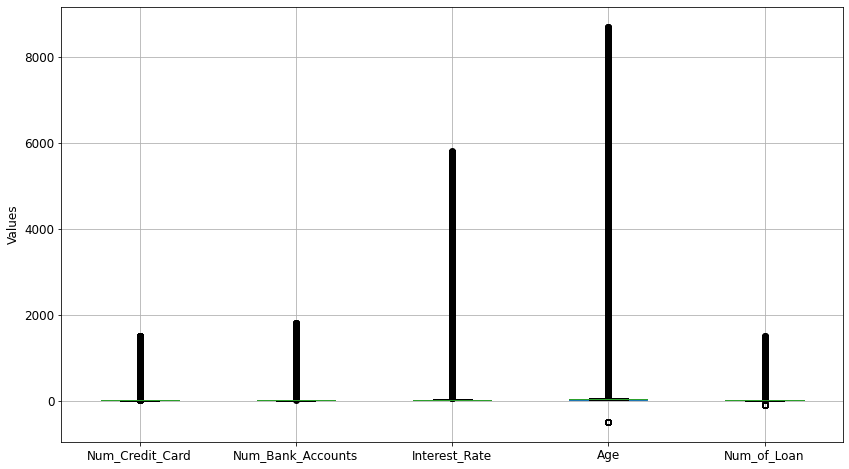

In [376]:
df.boxplot(column=['Num_Credit_Card', 'Num_Bank_Accounts', 'Interest_Rate', 'Age', 'Num_of_Loan'], figsize=(14,8))
plt.ylabel('Values')

### Num_Credit_Card

In [377]:
fig = px.box(df, y="Num_Credit_Card")
fig.show()

The min value is 0 and the upper fence value value is 11 but the maximum value is 1499. Clearly, these are outliers, as the person cannot have this many credit cards. Thus, these outliers have to be removed and imputed with better value. 

**KNN Imputer**

In [378]:
from sklearn.impute import KNNImputer

# Chnaging outlier values to NaN
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x : x if float(x) < 12 else np.nan)

imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
df[['Num_Credit_Card']] = imputer.fit_transform(df[['Num_Credit_Card']])

# Data spread after imputation
fig = px.box(df, y="Num_Credit_Card", title="After KNN Imputation")
fig.show()

### Num_Bank_Accounts

In [379]:
fig = px.box(df, y="Num_Bank_Accounts")
fig.show()

The min value is -1 (which shouldn't be) and the upper fence value value is 11 but the maximum value is 1798. Clearly, these are outliers, as the person cannot have this many number of bank accounts. Thus, these outliers have to be removed and imputed with better value. 

**KNN Imputer**

In [380]:
# Chnaging outlier values to NaN
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x : x if (float(x) < 12 and float(x) > 0) else np.nan)

imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
df[['Num_Bank_Accounts']] = imputer.fit_transform(df[['Num_Bank_Accounts']])

# Data spread after imputation
fig = px.box(df, y="Num_Bank_Accounts", title="After KNN Imputation")
fig.show()

### Interest_Rate

In [381]:
fig = px.box(df, y="Interest_Rate")
fig.show()

The min value is 1 and the upper fence value value is 34 but the maximum value is 5797. Clearly, these are outliers, as the interest rate cannot be this higher. Thus, these outliers have to be removed and imputed with better value. 

**KNN Imputer**

In [382]:
# Chnaging outlier values to NaN
df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x : x if float(x) < 35 else np.nan)

imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
df[['Interest_Rate']] = imputer.fit_transform(df[['Interest_Rate']])

# Data spread after imputation
fig = px.box(df, y="Interest_Rate", title="After KNN Imputation")
fig.show()

### Num_of_Loan

In [383]:
fig = px.box(df, y="Num_of_Loan")
fig.show()

Total number of loans cannot be negative also it cannot be as high as 1496. These outliers have to removed and imputed with suitable values.

**KNN Imputer**

In [384]:
# Chnaging outlier values to NaN
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x : x if (float(x) < 10 and float(x) >=0 ) else np.nan)

imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
df[['Num_of_Loan']] = imputer.fit_transform(df[['Num_of_Loan']])

# Data spread after imputation
fig = px.box(df, y="Num_of_Loan", title="After KNN Imputation")
fig.show()

### Age

In [385]:
fig = px.box(df, y="Age")
fig.show()

Age has so many outliers and has to be removed.

In [386]:
result_age = []
custAgeDict = {}

custIdGrouped = df.groupby('Customer_ID', as_index=False)

for row in df.itertuples():
    if row.Customer_ID in custAgeDict:
        ageMode = custAgeDict[row.Customer_ID]
    else:
        ageMode = stats.mode(custIdGrouped.get_group(row.Customer_ID)['Age']).mode[0]
        custAgeDict[row.Customer_ID] = ageMode
    currAge = row.Age
    if currAge in [ageMode-1, ageMode, ageMode+1]:
        result_age.append(currAge)
    else:
        result_age.append(ageMode)

df['Age'] = result_age

<ipython-input-386-ea4be7174254>:10: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [387]:
fig = px.box(df, y="Age")
fig.show()

Text(0, 0.5, 'Values')

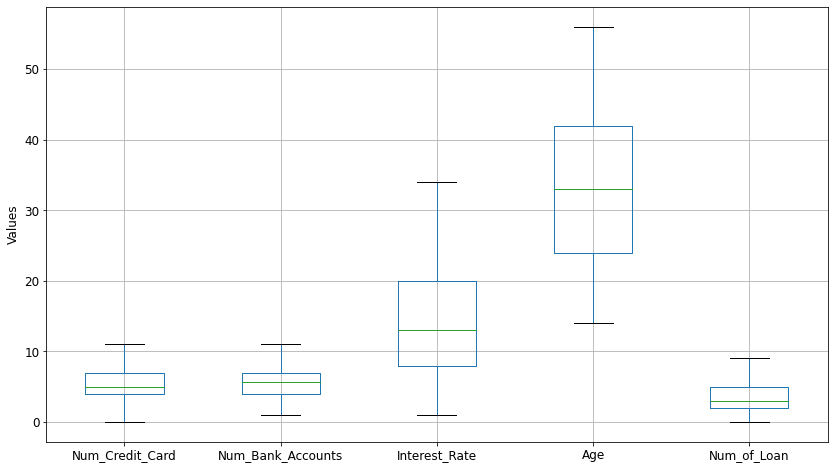

In [388]:
df.boxplot(column=['Num_Credit_Card', 'Num_Bank_Accounts', 'Interest_Rate', 'Age', 'Num_of_Loan'], figsize=(14,8))
plt.ylabel('Values')

## Type_of_Loan Analysis (EDA)

In [389]:
df['Type_of_Loan'] = data_df['Type_of_Loan']

In [390]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and ','')
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Not Specified')

In [391]:
val = ''

for i in df['Type_of_Loan'].values:
  if type(i) == str and i != '':
    val += i
    val += ', '
  
temp = val.split(', ')

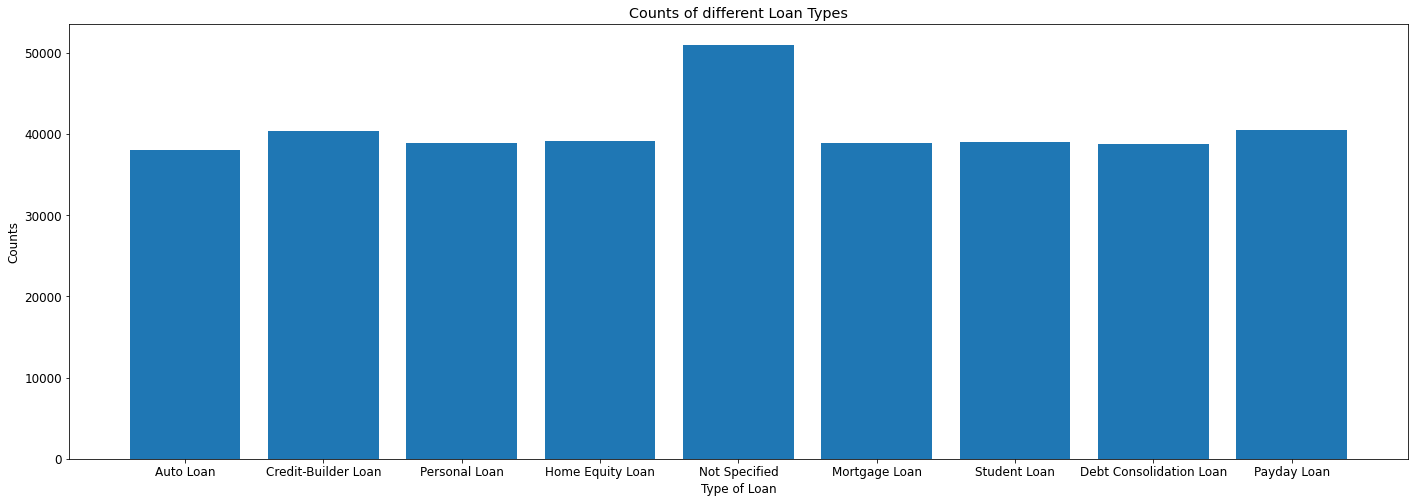

In [392]:
from collections import Counter

loan_type_counts = Counter(temp)
del loan_type_counts['']

plt.figure(figsize=(24,8))
plt.bar(loan_type_counts.keys(), loan_type_counts.values())
plt.xlabel('Type of Loan')
plt.ylabel('Counts')
plt.title('Counts of different Loan Types')
plt.show()

The total count of each loan type is almost close. The impact of loan type on the credit score has to be analyzed.


In [393]:
# Value counts of each loan type against credit score categories
loan_type_df = df[['Type_of_Loan' , 'Credit_Score']].apply(lambda x: x.str.split(',').explode())
loan_type_df['Type_of_Loan'] = loan_type_df['Type_of_Loan'].apply(lambda x : str(x).strip())
loan_type_df.head()

Type_of_Loan Credit_Score
0            Auto Loan         Good
0  Credit-Builder Loan         Good
0        Personal Loan         Good
0     Home Equity Loan         Good
1            Auto Loan         Good

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Auto Loan'),
  Text(1, 0, 'Credit-Builder Loan'),
  Text(2, 0, 'Personal Loan'),
  Text(3, 0, 'Home Equity Loan'),
  Text(4, 0, 'Not Specified'),
  Text(5, 0, 'Mortgage Loan'),
  Text(6, 0, 'Student Loan'),
  Text(7, 0, 'Debt Consolidation Loan'),
  Text(8, 0, 'Payday Loan')])

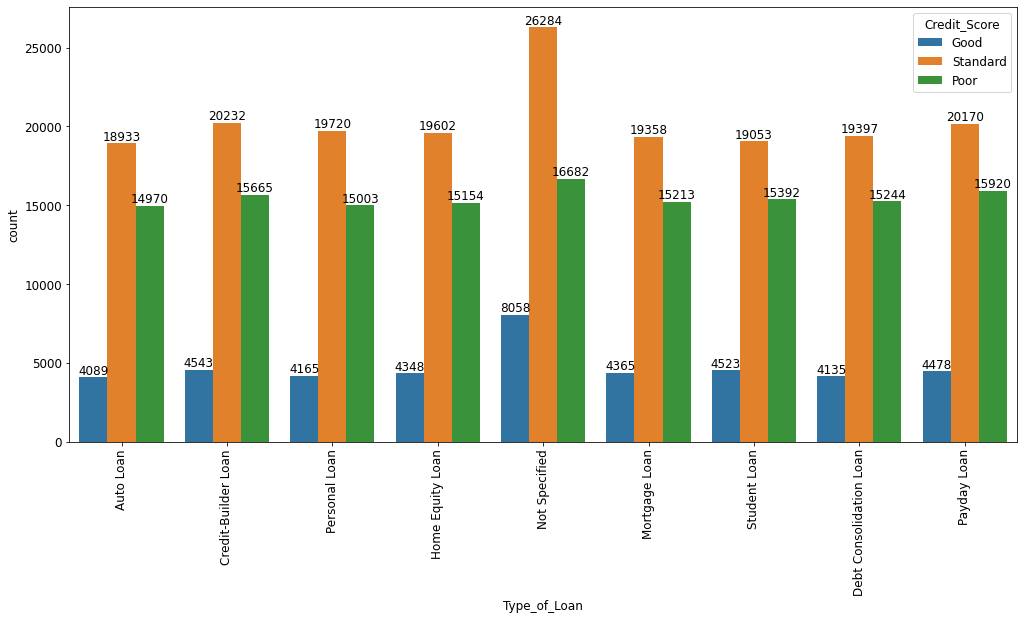

In [394]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x='Type_of_Loan', hue='Credit_Score', data=loan_type_df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)

All loan types have almost equal proportion of all credit score brackets and thus loan types don't influence the credit score.





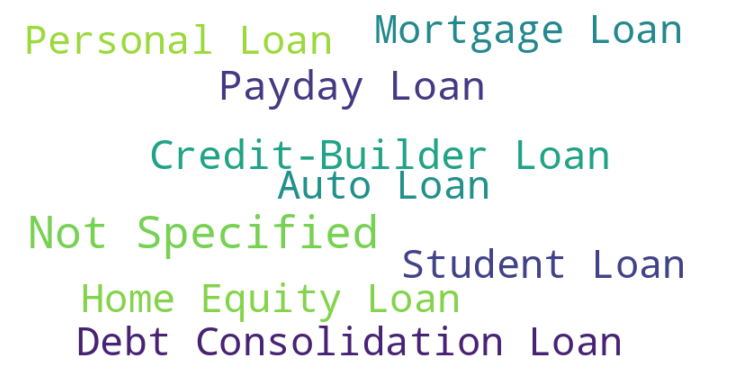

In [395]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_font_size=50, width=800, height=400)
wc.generate_from_frequencies(loan_type_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

The frequencies of all loan types are almost close and there is no imbalance.

## Occupation analysis (EDA)

<AxesSubplot:ylabel='Occupation'>

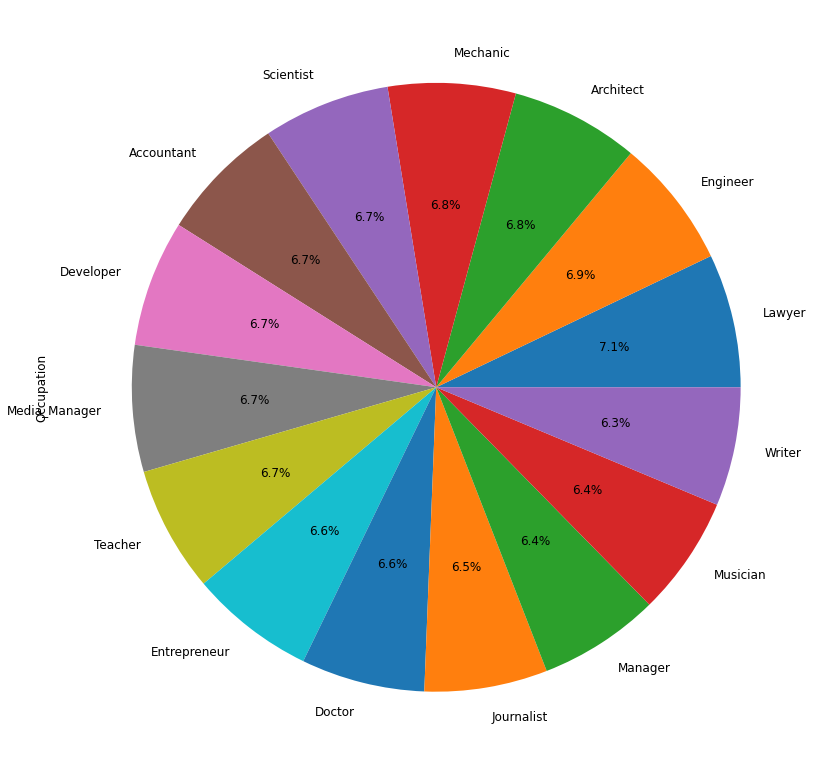

In [396]:
# Checking the proportion of records for each profession in the dataset, to check for bias
df['Occupation'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(14,14))

The proportion of records for each occupation is almost similar. Ther is no bias introduced.

<AxesSubplot:xlabel='Occupation'>

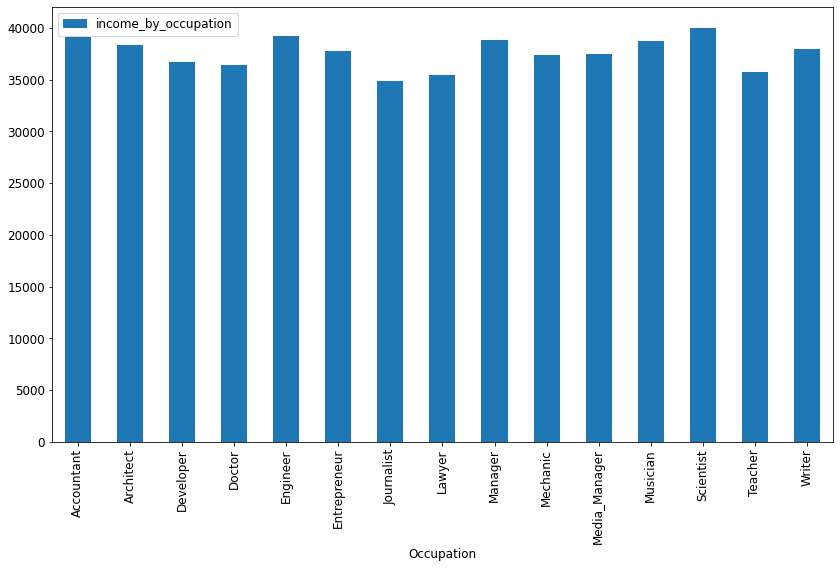

In [397]:
# Checking the annual income of each profession to understand the influence of profession in determining credit score brackets
df.groupby('Occupation').aggregate(income_by_occupation=('Annual_Income', 'median')).plot.bar(figsize=(14,8))

The annual income of different profession is almost similar.

<AxesSubplot:xlabel='Occupation,Credit_Score'>

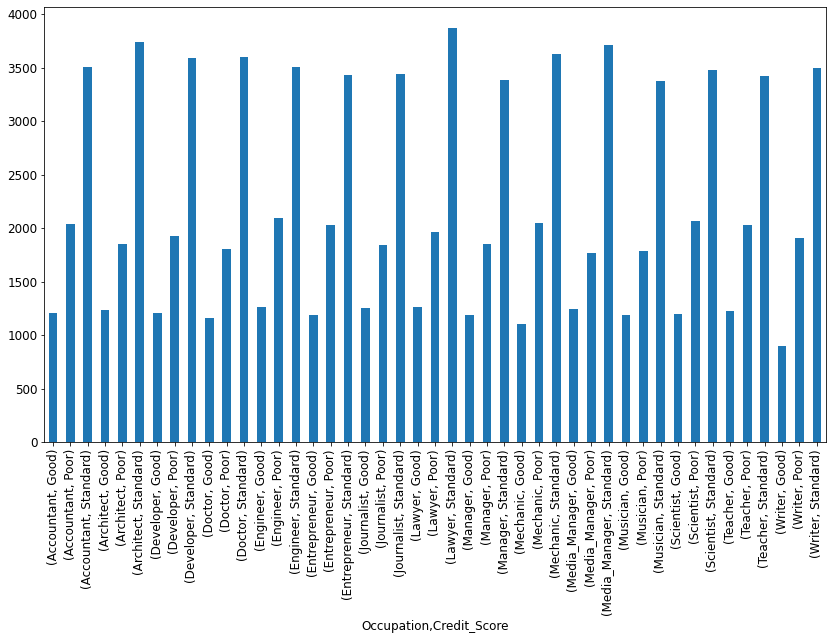

In [398]:
# Checking the proportion of each credit score brackets for each profession to inspect the bias
df.groupby(['Occupation', 'Credit_Score'])['Credit_Score'].count().plot(kind='bar', stacked=True, figsize=(14,8))

All professions have almost equal proportion of credit score brackets. No bias.

## Analyzing trends, clusters and pattern of input features against target variable (EDA)

Oustanding debt vs Total EMI per month

[Text(0.5, 0, 'Outstanding Debt'), Text(0, 0.5, 'Total EMI per month')]

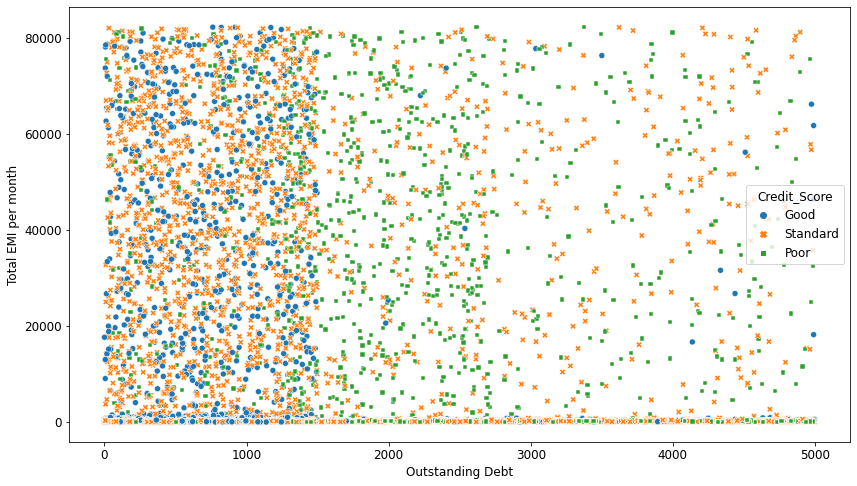

In [399]:
plt.figure(figsize=(14,8))
sp = sns.scatterplot(data = df, x='Outstanding_Debt', y='Total_EMI_per_month', hue='Credit_Score', style='Credit_Score')
sp.set(xlabel='Outstanding Debt', ylabel='Total EMI per month')

**Insights**
* Outstanding_debt and Total_EMI_per_month are good at distinguishing 'Good' and 'Poor' Credit score. Most of the data points that belong to Good score brackets are clustered towards left and most of the data point that belong Poor score brackets are clustered from centre towards right.
* Customers with outstanding debt of more than 1500 USD are more likely to have Poor credit score.
* Total EMI per month is not good at differentiating the target variable categories.
* There is no perceivable trend in the above scatter plot.

[Text(0.5, 0, 'Number of Credit Cards'), Text(0, 0.5, 'Interest Rate')]

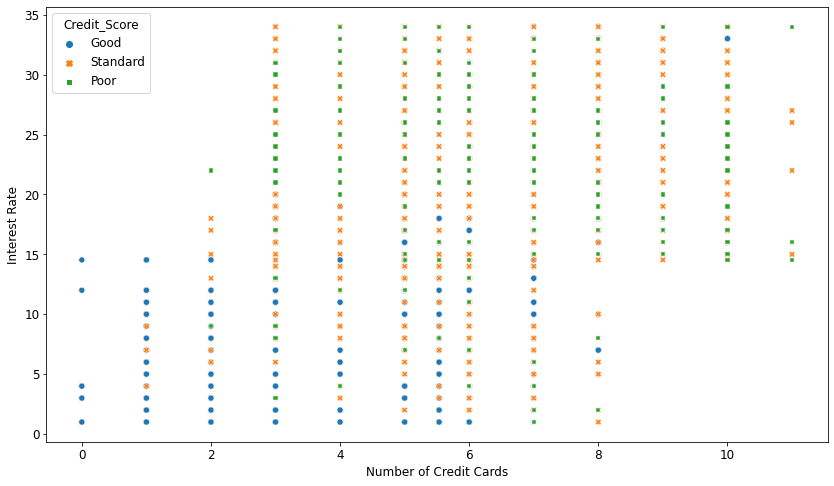

In [400]:
plt.figure(figsize=(14,8))
sp = sns.scatterplot(data = df, x='Num_Credit_Card', y='Interest_Rate', hue='Credit_Score', style='Credit_Score')
sp.set(xlabel='Number of Credit Cards', ylabel='Interest Rate')

**Insights**
* Customers with less than 3 credit cards are more likely to have Good Credit Score.
* Also, customers with interest rate less than 15% are more likely to have Good Credit score.
* For all other scenarios, Standard and Poor credit score are equally likely.

<Figure size 1440x720 with 0 Axes>

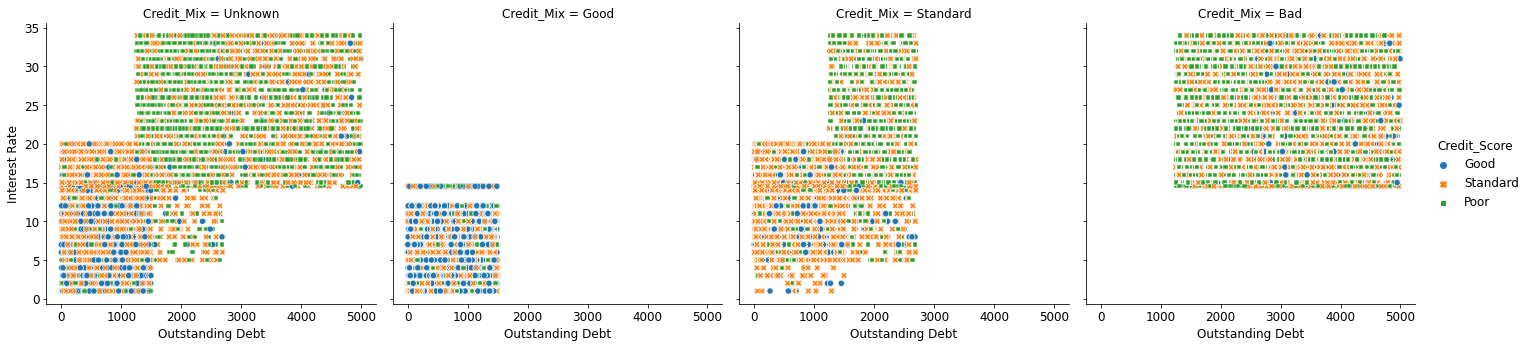

In [401]:
# Relational plot
plt.figure(figsize=(20,10))
rel_plot = sns.relplot(data=df, x='Outstanding_Debt', y='Interest_Rate', col='Credit_Mix', hue='Credit_Score', style='Credit_Score')
rel_plot.set(xlabel='Outstanding Debt', ylabel='Interest Rate')

**Insights**
* Credit_Mix shows strong relationship with the target variable. If the Credit_Mix = Standard, then the customers are more likely to have Standard credit score as long as their outstanding debt is is less than 1500 USD and interest rate is less than 15%.
* If the Credit_Mix is Bad, the customers are less likely to have Good credit score irrespective of their interest rate and outstanding debt.
* All customers with Bad Credit_Mix have interest rate higher than 15% and outstanding debt more than 100 USD.
* For customers with good Credit_Mix, all data points are clustered towards lower left with interest rate < 15% and debt < 1500 USD.
* Crdit mix, interest rate and debt seem to be important features in distinguishing the target variable.

## Correlation between Numerical features (EDA)

<AxesSubplot:>

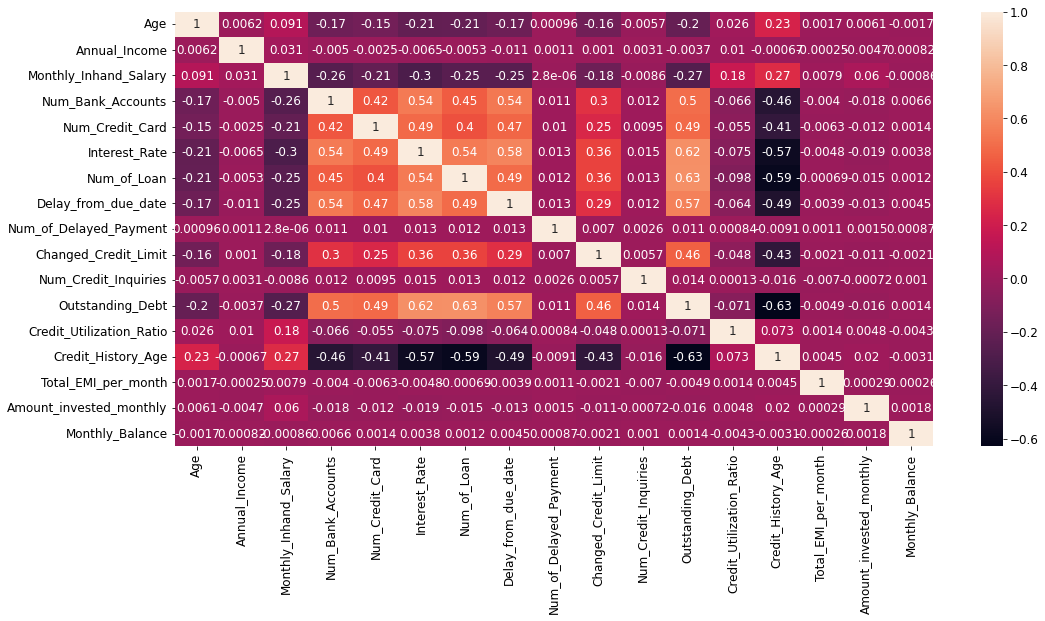

In [402]:
# Correlation heatmap for numerical features in the dataset
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True)

## Categorical Features association - Chi-squared test (EDA)


In [403]:
from scipy.stats import chi2_contingency

categorical_features = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

for feature in categorical_features:
  #chi-squared test 
  chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Credit_Score'], df[feature]))
  print(f"{feature} vs Credit_Score")
  print('-'*35)
  print(f'Chi-squared statistic: {chi2}')
  print(f'p-value: {p}')
  if p < 0.05:
    print(f"Statistically Significant \n")
  else:
    print(f"Statistically Not Significant \n")

Occupation vs Credit_Score
-----------------------------------
Chi-squared statistic: 180.68588839512742
p-value: 2.907103747503745e-24
Statistically Significant 

Credit_Mix vs Credit_Score
-----------------------------------
Chi-squared statistic: 32349.299414404555
p-value: 0.0
Statistically Significant 

Payment_of_Min_Amount vs Credit_Score
-----------------------------------
Chi-squared statistic: 19620.39479123322
p-value: 0.0
Statistically Significant 

Payment_Behaviour vs Credit_Score
-----------------------------------
Chi-squared statistic: 1430.4885276214884
p-value: 3.7110434700172227e-299
Statistically Significant 



## Distribution of Numerical Features (EDA)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [405]:
numerical_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
                  'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                  'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                  'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

for col in numerical_cols:
  temp = df.groupby(["Customer_ID"]).aggregate(val=(col, 'mean'))

  fig = px.histogram(temp, x='val', title=f'Histogram of {col} grouped by Customer ID',
                   labels={val:col}, nbins=50)
  fig.show()

**Insights**
* The distribution of Credit_Utilization_Ratio is near normal. All other distributions are either right skewed or left skewed.
* 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance' have few extreme outliers due to which the distribution of these features are extremely skewed. Log transformation of these features can fix this issue.

In [406]:
# log transformation of skewed distribution - monthly balance
temp = df.groupby(["Customer_ID"]).aggregate(val=('Monthly_Balance', 'mean'))
temp = temp.apply(np.log)
fig = px.histogram(temp, x='val', title=f'Histogram of {col} grouped by Customer ID',
                   labels={val:col}, nbins=50)
fig.show()

## Outlier Removal through log transformation (DC)

In [407]:
skewed_cols = ['Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
               'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

for col in skewed_cols:
  df[col] = df[col].apply(lambda x : np.log(x+1))

## Association between numerical and categorical features (EDA)


1.   Kruskal-Wallis Test



In [408]:
# Kruskal-Wallis test
print("="*15)
print("Kruskal-Wallis Test")
print("="*15)

for feature in numerical_cols:
  group1 = df[df['Credit_Score'] == 'Good'][feature]
  group2 = df[df['Credit_Score'] == 'Standard'][feature]
  group3 = df[df['Credit_Score'] == 'Poor'][feature]

  h_stat, p_val = stats.kruskal(group1, group2, group3)

  print(f"{feature} vs Credit_Score")

  print(f"P value = {p_val}")
  if p_val < 0.05:
    print("Statistically Significant. \n")
  else:
    print("Statistically Not Significant. \n")

Kruskal-Wallis Test
Annual_Income vs Credit_Score
P value = 0.0
Statistically Significant. 

Monthly_Inhand_Salary vs Credit_Score
P value = 0.0
Statistically Significant. 

Num_Bank_Accounts vs Credit_Score
P value = 0.0
Statistically Significant. 

Num_Credit_Card vs Credit_Score
P value = 0.0
Statistically Significant. 

Interest_Rate vs Credit_Score
P value = 0.0
Statistically Significant. 

Num_of_Loan vs Credit_Score
P value = 0.0
Statistically Significant. 

Delay_from_due_date vs Credit_Score
P value = 0.0
Statistically Significant. 

Num_of_Delayed_Payment vs Credit_Score
P value = 0.0
Statistically Significant. 

Changed_Credit_Limit vs Credit_Score
P value = 0.0
Statistically Significant. 

Num_Credit_Inquiries vs Credit_Score
P value = 0.0
Statistically Significant. 

Outstanding_Debt vs Credit_Score
P value = 0.0
Statistically Significant. 

Credit_Utilization_Ratio vs Credit_Score
P value = 1.082011306670754e-39
Statistically Significant. 

Credit_History_Age vs Credit_Sc

In [409]:
df['Amount_invested_monthly'].describe()

count    100000.000000
mean          5.111658
std           1.260382
min           0.000000
25%           4.344546
50%           4.938029
75%           5.619209
max           9.210440
Name: Amount_invested_monthly, dtype: float64

## Feature Engineering - Adding new features (DC)

The feature *'Type_of_loan'* contains a list of different types of loans taken by each customer. There are eight different types of loans and some customers have taken the same loan multiple times (eg: Student Loan). Eight new columns will be created for each loan category, each contains the numerical value representing the total number of times taken.

In [410]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(' and ','')
temp = df["Type_of_Loan"].str.split(pat = ",", expand=True).apply(lambda x : x.value_counts(), 
                                                                  axis = 1).fillna(0).astype(int)
temp

Auto Loan   Credit-Builder Loan   Debt Consolidation Loan  \
0               0                     1                         0   
1               0                     1                         0   
2               0                     1                         0   
3               0                     1                         0   
4               0                     1                         0   
...           ...                   ...                       ...   
99995           0                     0                         0   
99996           0                     0                         0   
99997           0                     0                         0   
99998           0                     0                         0   
99999           0                     0                         0   

        Home Equity Loan   Mortgage Loan   Not Specified   Payday Loan  \
0                      1               0               0             0   
1                      1               0               0             0   
2                      1               0               0             0   
3                      1               0               0             0   
4                      1               0               0             0   
...                  ...             ...             ...           ...   
99995                  0               0               0             0   
99996                  0               0               0             0   
99997                  0               0               0             0   
99998                  0               0               0             0   
99999                  0               0               0             0   

        Personal Loan   Student Loan  Auto Loan  Credit-Builder Loan  \
0                   1              0          1                    0   
1                   1              0          1                    0   
2                   1              0          1                    0   
3                   1              0          1                    0   
4                   1              0          1                    0   
...               ...            ...        ...                  ...   
99995               0              1          1                    0   
99996               0              1          1                    0   
99997               0              1          1                    0   
99998               0              1          1                    0   
99999               0              1          1                    0   

       Debt Consolidation Loan  Home Equity Loan  Mortgage Loan  \
0                            0                 0              0   
1                            0                 0              0   
2                            0                 0              0   
3                            0                 0              0   
4                            0                 0              0   
...                        ...               ...            ...   
99995                        0                 0              0   
99996                        0                 0              0   
99997                        0                 0              0   
99998                        0                 0              0   
99999                        0                 0              0   

       Not Specified  Payday Loan  Personal Loan  Student Loan  
0                  0            0              0             0  
1                  0            0              0             0  
2                  0            0              0             0  
3                  0            0              0             0  
4                  0            0              0             0  
...              ...          ...            ...           ...  
99995              0            0              0             0  
99996              0            0              0             0  
99997              0            0  

In [411]:
# Columns were generated redundantly with different name, thus combining the count values and removing the duplicate
final = temp.copy()

final['Auto Loan'] = final['Auto Loan'] + final[' Auto Loan']
del final[' Auto Loan']

final['Credit-Builder Loan'] = final['Credit-Builder Loan'] + final[' Credit-Builder Loan']
del final[' Credit-Builder Loan']

final['Debt Consolidation Loan'] = final['Debt Consolidation Loan'] + final[' Debt Consolidation Loan']
del final[' Debt Consolidation Loan']

final['Home Equity Loan'] = final['Home Equity Loan'] + final[' Home Equity Loan']
del final[' Home Equity Loan']

final['Mortgage Loan'] = final['Mortgage Loan'] + final[' Mortgage Loan']
del final[' Mortgage Loan']

final['Not Specified'] = final['Not Specified'] + final[' Not Specified']
del final[' Not Specified']

final['Payday Loan'] = final['Payday Loan'] + final[' Payday Loan']
del final[' Payday Loan']

final['Personal Loan'] = final['Personal Loan'] + final[' Personal Loan']
del final[' Personal Loan']

final['Student Loan'] = final['Student Loan'] + final[' Student Loan']
del final[' Student Loan']

final.columns

Index(['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan',
       'Personal Loan', 'Student Loan'],
      dtype='object')

In [412]:
processed_df = pd.concat([df, final], axis=1)

# removing type of loan feature
processed_df.drop('Type_of_Loan', axis=1, inplace=True)

processed_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

## Label encoding categorical column - 'Month' (DC)

The months have some hierarchy, so using label encoder to convert it to numerical values

In [413]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
processed_df['Month'] = le.fit_transform(processed_df['Month'])

## One-Hot Encoding categorical columns (DC)

The categorical values in some of the categorical columns should be treated with equal weightage during modelling. Thus, One-Hot encoding these columns to convert it to numerical values.

In [425]:
encoded_df = pd.get_dummies(processed_df, columns=['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'])
encoded_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupati

## Dropping features (DC)

High Cardinality features

In [426]:
encoded_df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)

Absence of statisitically significant relationship

In [427]:
# 'Monthly_Balance' feature doesn't exhibit significant relationship with credit score brackets (Kruskal-Wallis test proved)
encoded_df.drop(['Monthly_Balance'], axis=1, inplace=True)

## Scaling numerical features (DC)

To prevent the model from being biased towards features with high magnitudes, all numerical features have to be transformed to have similar scale.

In [428]:
from sklearn.preprocessing import MinMaxScaler

cols = ['Month','Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan',
        'Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt',
        'Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly']

scaler = MinMaxScaler()
encoded_df[cols] = scaler.fit_transform(encoded_df[cols])

In [429]:
encoded_df.head()

Month       Age  Annual_Income  Monthly_Inhand_Salary  \
0  0.428571  0.214286       0.123182               0.102087   
1  0.285714  0.214286       0.123182               0.102087   
2  0.857143  0.214286       0.123182               0.102087   
3  0.000000  0.214286       0.123182               0.102087   
4  1.000000  0.214286       0.123182               0.102087   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                0.2         0.363636       0.060606     0.444444   
1                0.2         0.363636       0.060606     0.444444   
2                0.2         0.363636       0.060606     0.444444   
3                0.2         0.363636       0.060606     0.444444   
4                0.2         0.363636       0.060606     0.444444   

   Delay_from_due_date  Num_of_Delayed_Payment  ...  Payment_of_Min_Amount_NM  \
0             0.044776                0.247880  ...                         0   
1             0.000000                0.191853  ...                         0   
2             0.044776                0.247880  ...                         0   
3             0.074627                0.191853  ...                         0   
4             0.089552                0.191853  ...                         0   

   Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  \
0                         1                          0   
1                         1                          0   
2                         1                          0   
3                         1                          0   
4                         1                          0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  1    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 0   

  Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                 0   
1                                                 0   
2                                                 1   
3                                                 0   
4                                                 0   

   Payment_Behaviour_Low_spent_Small_value_payments  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 1   
4                                                 0   

   Payment_Behaviour_Not_Specified  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 56 columns]

In [430]:
encoded_df.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Cr

# References

- C. O’Neill and R. Schutt. Doing Data Science., O’Reilly. 2013.
- [NIST on EDA](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm)
- [Dataset](https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv)
- [Numpy Documentation](https://numpy.org/doc/stable/reference/)
- [Pandas Documentation](https://pandas.pydata.org/docs/reference/)
- [Seaborn Documentation](https://seaborn.pydata.org/api.html)
- [Plotly Documentation](https://plotly.com/python/getting-started/)
- [Matplotlib Documentation](https://matplotlib.org/stable/index.html#matplotlib-release-documentation)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/modules/classes.html)
- [Python Documentation](https://docs.python.org/3.9/library/index.html)

